In [ ]:
# The task in this section is to use a decision tree regressor model to predict house prices with the CA housing data presented in the last module. 
# You can find the data set here and a description here. Our goal is to build a model with the highest r2 value on the test set.

In [23]:
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
df = pd.read_csv('C:\\Users\\User\\github_projects\\Machine_Learning_with_Python\\datasets\\cali_housing.csv')
df.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


In [24]:
# Assign your target vector and features matrix

y = df['MedHouseVal']
X = df.drop(columns = 'MedHouseVal')

# Train test split (model validation)
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

In [25]:
# Decision tree

# Step 1: Import the model you want to use
# This was already imported earlier so commenting it out
# from sklearn.tree import DecisionTreeClassifier

# Step 2: Make an instance of the Model
# By leaving the parenthesis empty, we are choosing to use all of the default parameters
# So you get the same results, let's set our random_state to the same number
dec_tree = DecisionTreeRegressor(random_state = 42)

# Step 3: Fit the model using your training data.  The model is learning the relationship between the features (X) and the target (y).
dec_tree.fit(X_train, y_train)

# Step 4: Predict the target values for the training set and the test test.  (Note: You can get the score without this step, but if you want to actually see what the predictions are, this is a helpful step)
train_preds = dec_tree.predict(X_train)
test_preds = dec_tree.predict(X_test)

# Step 5: Evaluate the Model
train_score = dec_tree.score(X_train, y_train)
test_score = dec_tree.score(X_test, y_test)
print(train_score)
print(test_score)

# The evaluation metric used here is the R^2.  
# It  should be clear that the default decision tree had a much higher R^2 score on the training data than it did on the test data.  
# This is an indication that the model is overfit. 

1.0
0.600578011919574


In [26]:
# Step 6: Tune the Model
# To explore what can be tuned for a model, it can be very helpful to just run the name of your instantiated model. 
# The output will be all of the parameters you can adjust when you instantiate that type of model. 

# Looking at options for tuning this model
dec_tree.get_params()

{'ccp_alpha': 0.0,
 'criterion': 'squared_error',
 'max_depth': None,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'random_state': 42,
 'splitter': 'best'}

As you can see in the output above, there are many options for tuning a decision tree regressor!    
Tuning models is something you will get more experience with over time.  
For now, lets just look at how we go about tuning one key parameter: the depth of our tree. 
The default value for max_depth is None so the model we ran above was not limited.  
Before we start adjusting this parameter, lets check and see what the depth of our default tree was


In [27]:
# What was the depth of our default tree?
dec_tree.get_depth()

36

In [28]:
# We see that our tree had a depth of 36. 
# We can also see how many leaf nodes our tree had.

# How many leaf nodes?
dec_tree.get_n_leaves()


14841

In [29]:
# Finding the optimal max_depth (hyperparameter tuning)
# First, lets try a few options to see how changing this parameter affects our model.
# Let's go extreme and set our max depth to 2
dec_tree_2 = DecisionTreeRegressor(max_depth = 2, random_state = 42)
dec_tree_2.fit(X_train, y_train)
train_2_score = dec_tree_2.score(X_train, y_train)
test_2_score = dec_tree_2.score(X_test, y_test)
print(train_2_score)
print(test_2_score)

0.45120526546918793
0.4308859489546041


In [30]:
# As we can see our scores on both the training and test sets are much lower.  This indicates that with a max depth of 2, our model is underfit.
# Let's try something in between 2 and 36.  What are the results with a max depth of 15?
dec_tree_15 = DecisionTreeRegressor(max_depth = 15, random_state = 42)
dec_tree_15.fit(X_train, y_train)
train_15_score = dec_tree_15.score(X_train, y_train)
test_15_score = dec_tree_15.score(X_test, y_test)
print(train_15_score)
print(test_15_score)

# We can see that this is better than  a max depth of 2, and does slightly better on the test set than our default parameters.

0.9607711965105608
0.624301329181203


In [31]:
# It can be time consuming to manually try all of the possibilities for a parameter.  One way to make this faster is to write a function.  
# (Note that we will learn a more advanced way (GridSearch) of hypertuning multiple parameters at a time soon, so don't get too hung up on writing these functions!)

# List of values to try for max_depth:
max_depth_range = list(range(2, 36)) # will try every value between 2 and 36
# List to store the score for each value of max_depth:
r2 = []
for depth in max_depth_range:
    dec_tree = DecisionTreeRegressor(max_depth = depth, random_state = 42)
    dec_tree.fit(X_train, y_train)
    score = dec_tree.score(X_test, y_test)

r2.append(score)


In [32]:
print(r2)

[0.604649656128087]


ValueError: x and y must have same first dimension, but have shapes (34,) and (1,)

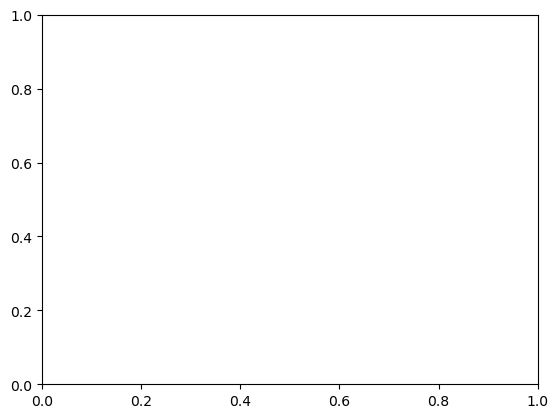

In [33]:
# To help us see the results of trying various tree depths, the following code creates a visualization of R2 vs max_depth.
# Visualize which max_depth leads to the highest r2 score
import matplotlib.pyplot as plt
plt.plot(max_depth_range, r2)
plt.xlabel('max_depth')
plt.ylabel('R2')


In [19]:
# From the image above, it looks like the best score for the model is when the parameter max_depth is 9.  
# Let's run the model with our optimized value for max_depth
dec_tree_9 = DecisionTreeRegressor(max_depth = 9, random_state = 42)
dec_tree_9.fit(X_train, y_train)
train_9_score = dec_tree_9.score(X_train, y_train)
test_9_score = dec_tree_9.score(X_test, y_test)
print(train_9_score)
print(test_9_score)


0.7961670169616584
0.6913416719998345


In [20]:
# Notice how the training and test results have moved closer to each other (a sign that we have reduced overfitting) and that the testing score has improved.